<h1 style = "font-family: Comic Sans MS	"> Cleaning data </h1>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 

In [30]:
df = pd.read_excel('E:\Me\Health survey.xlsx', engine='openpyxl')

In [31]:
df.columns

Index(['Timestamp', 'ID', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [32]:
df.drop(columns='Timestamp')

,ID,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1.0,37.0,Female,United States,IL,NaN,No,Yes,Often,2021-06-25 00:00:00,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2.0,44.0,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3.0,32.0,Male,Canada,NaN,NaN,No,No,Rarely,2021-06-25 00:00:00,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4.0,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5.0,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender', nan],
      dtype=object)

In [34]:
df['Gender'] = df['Gender']. replace(['M', 'male', 'm', 'Male-ish', 'maile', 'Mal', 'Make'], 'Male')
df['Gender'] = df['Gender']. replace(['female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female '], 'Female')
df['Gender'] = df['Gender']. replace(['Trans-female', 'Cis Female', 'something kinda male?', 'Male (CIS)', 'queer/she/they','Cis Male', 'non-binary', 'Nah', 'All','Enby', 'fluid','Genderqueer', 'Androgyne','Agender'], 'Other')
df['Gender'].fillna('Other', inplace=True)
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [35]:
df['Age'].median()

30.0

In [36]:
df["Age"] = np.where(df["Age"] <0, 30,df['Age'])
df["Age"] = np.where(df["Age"] >100, 30,df['Age'])
df['Age'].fillna(30, inplace=True)
df['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65.])

<h1 style = "font-family: Comic Sans MS	"> Exploratory Data Anlysis </h1>

The dataset is provided by **Open Sourcing Illness**, a non-profit organization dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. This survey is conducted by respondents who have mental health disorders in tech companies

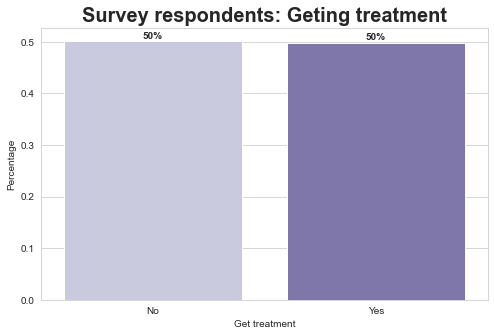

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Survey respondents: Geting treatment', fontsize=20, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('Get treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Get treatment', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

This is the result of respond to question: **"Have you sought treatment for a metal health condition?"**

We can see that the number of responders seek and do not seek for treatment is equal, at 50%.

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


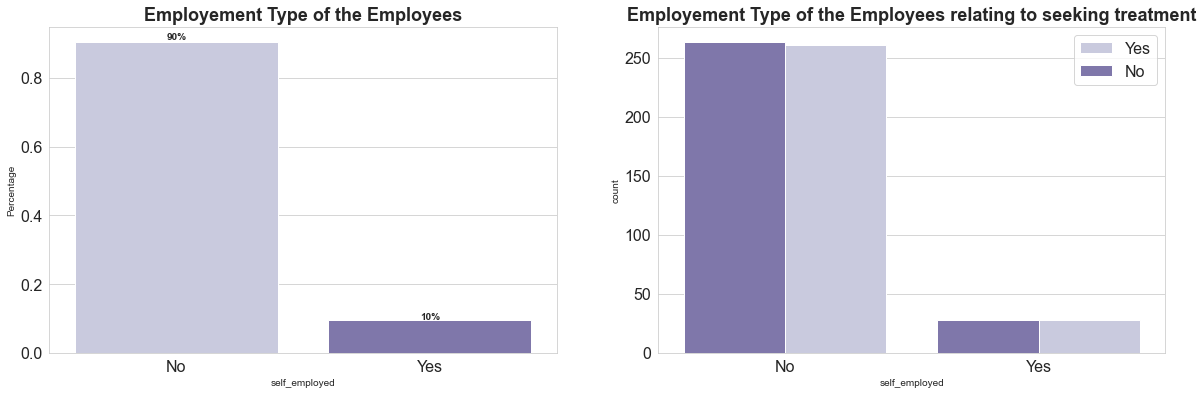

In [38]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')
    plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
ax = sns.countplot(df['self_employed'], hue = df['treatment'], palette = 'Purples')
ax.invert_xaxis()
plt.title('Employement Type of the Employees relating to seeking treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Are you self-employed?"** 

We can see that the number of peopel are self employed significantly lower than employed (10% compared to 90%). However, the number of respondents seeking for treatment are quite similar. Both type of employment having half of respodents have seek for treatments. 

We can conclude that type of employments do not influence whether a person seeks for treatments or not. 

No handles with labels found to put in legend.
C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


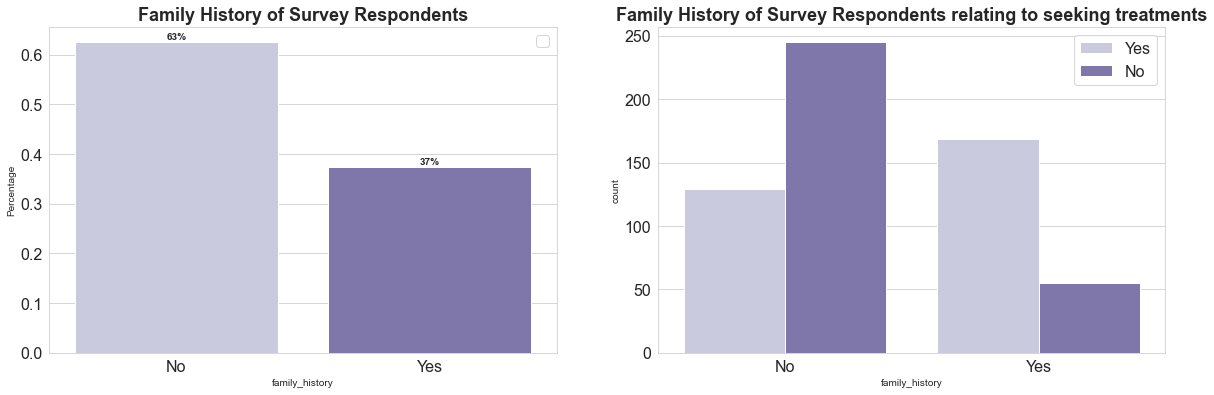

In [39]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'], palette='Purples')
plt.title('Family History of Survey Respondents relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

This is the result of responds to question: **"Do you have a family history of mental illness?"**  

We can see that respondents who have family history of mental illness having a much high chance of having to seek treatments. The reason can be that they are more familiar with mental health treatments and pay more attention to mental health. 

However, family history of mental illness could be a factor lead to high chance of having servere mental illness of respondents, due to the higher percentage of them seeking treatments. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


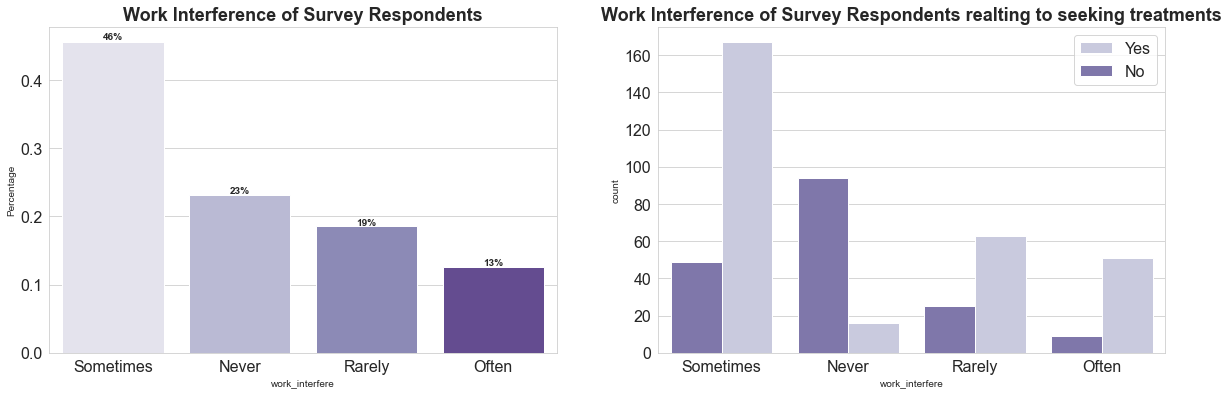

In [40]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
ax1 = sns.countplot(df['work_interfere'], hue = df['treatment'], palette = 'Purples')
ax1.invert_xaxis()
plt.title('Work Interference of Survey Respondents realting to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"If you have a mental health condition, do you feel that it interferes with your work?"**

Respondents answering Sometimes having the highest percentage of respondents seeking treatments. The same can be applied to person answering Often. We can see from the result that ussualy having mental illness will have negative effect on productivity. 

Another view is that there are still some respondents answering Never still seek for treatments. That is because they might not be suitable with the job, therefore they get more stress and they seek for treatments before it become severe. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


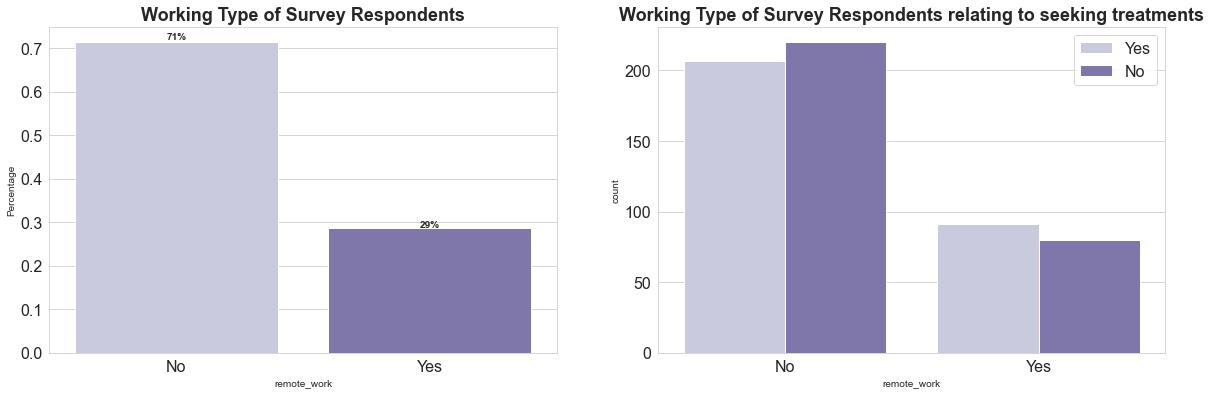

In [41]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['remote_work'], hue = df['treatment'], palette='Purples')
plt.title('Working Type of Survey Respondents relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Do you work remotely (outside of an office) at least 50% of the time?"**

Most of respondents do not work remotely, means that working at the office have higher chance of getting mental illness that working remotely. However the number of respondents seeking treatments are similar in both category. We can conclude that working type have major effect on severe mental illness but having little influence on light mental illness. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


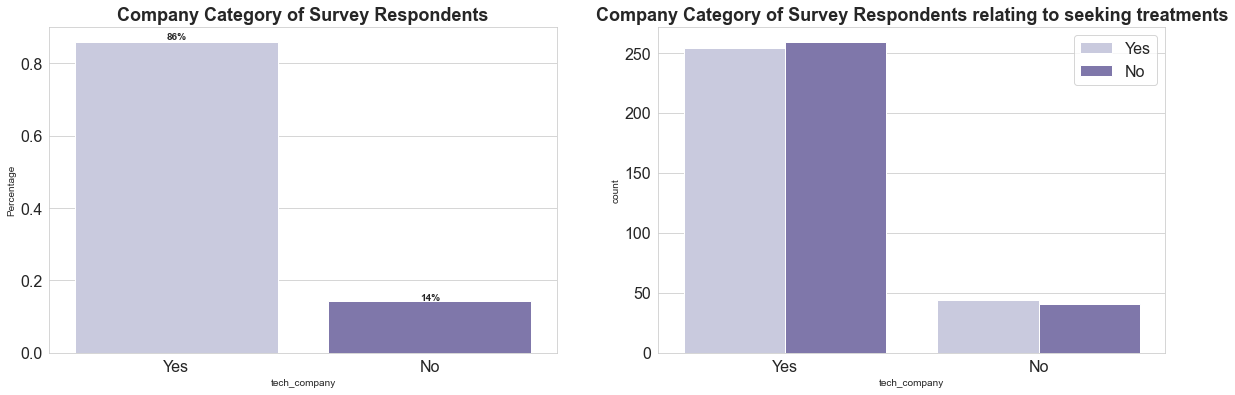

In [42]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['tech_company'], hue = df['treatment'], palette='Purples')
plt.title('Company Category of Survey Respondents relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Is your primarily a tech company/organization?"**

Although the survey was conducted in the tech industry, there are still around 18% of respondents working in a non tech company. 

However, the number of respondents seeking for mental health treatments is quite the same. There are only a minor different in numbers but is not significant. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


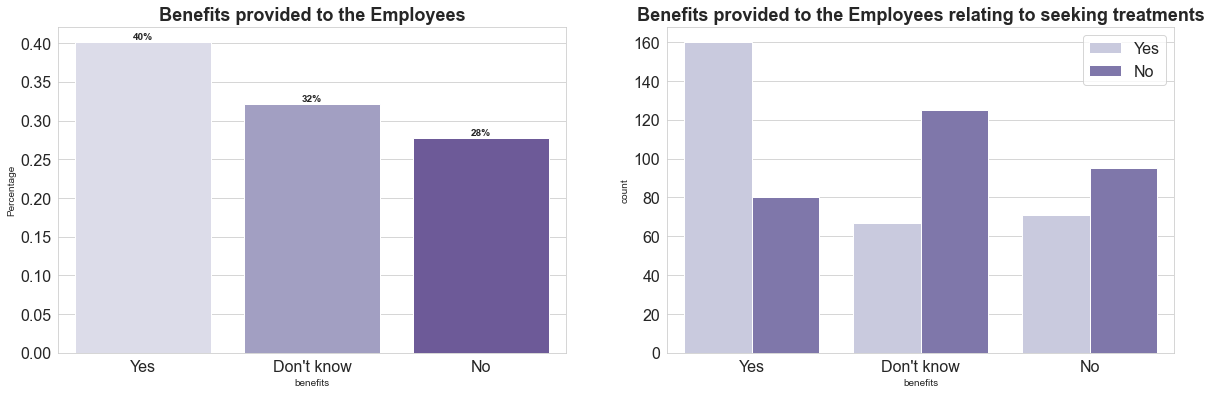

In [43]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['benefits'], hue = df['treatment'], palette='Purples')
plt.title('Benefits provided to the Employees relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Does your employer provide mental health benefits?"**

We can see that around 40% of respondents said that their employer does provide mental health benefits. There are still a high percent (32%) does not know about whether they were provided mental health benefits. 

Suprisingly, respondents who were provided mental health treatments have the hight precent of seeking treatments. This could be explained by the fact that they will aware of the benefit of mental health treatments but companies do not provide suitable treatments. Therefore, they have to seek for treatments outside. Respondents who do not know or is not provided mental health treatments at work usually have to seek treatments outside as they have higher percentage of seeking treatments.

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


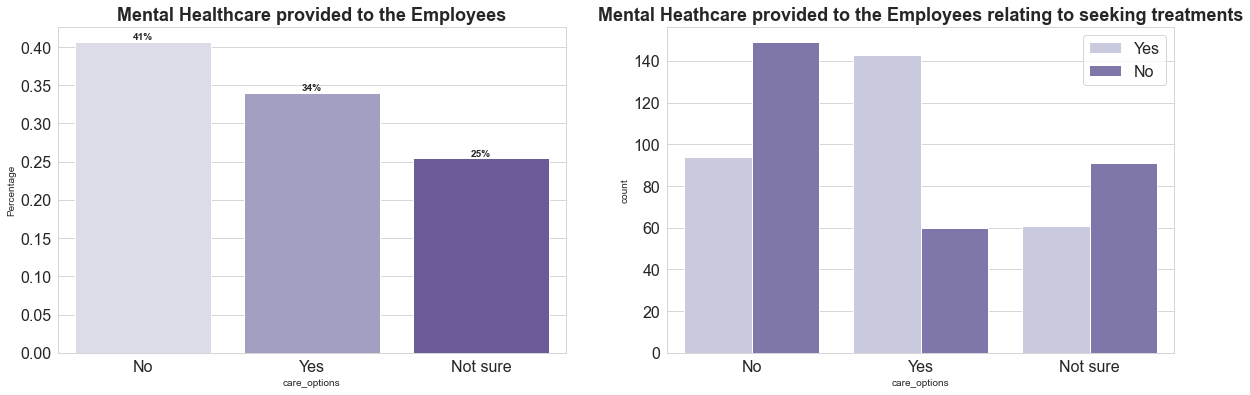

In [44]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Mental Healthcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
answer_order = ["No", "Yes", "Not sure"]
ax1 = sns.countplot(df['care_options'], hue = df['treatment'], palette='Purples', order=answer_order)
plt.title('Mental Heathcare provided to the Employees relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"DO you know the options for mental health care your employer provides?"**

Similar to the previous chart, respondents who having options about mental health care will seek for treatments more and who do not have or do not know about it will seek less. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


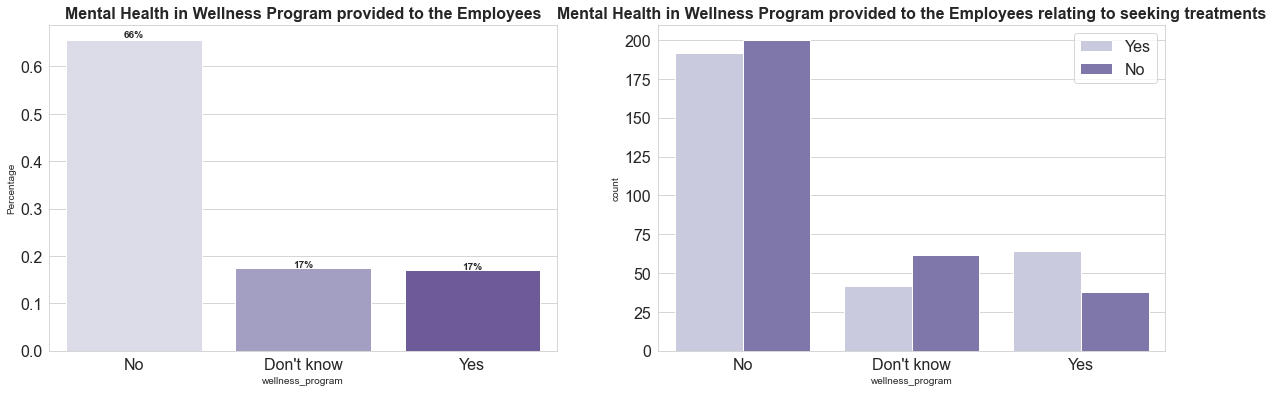

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['wellness_program'], hue = df['treatment'], palette='Purples')
plt.title('Mental Health in Wellness Program provided to the Employees relating to seeking treatments', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Has your employer ever discussed mental health as part of an employee wellness program?"**

Similar to two previous chart, respondents who aware of mental health will likely to seek treatments more from outside. However, there are a significant number of respondents do not have a wellness program including mental health and half of them are seeking treatments. That means company must realize the harmfulness of the lack of mental health care and should provide it soon. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


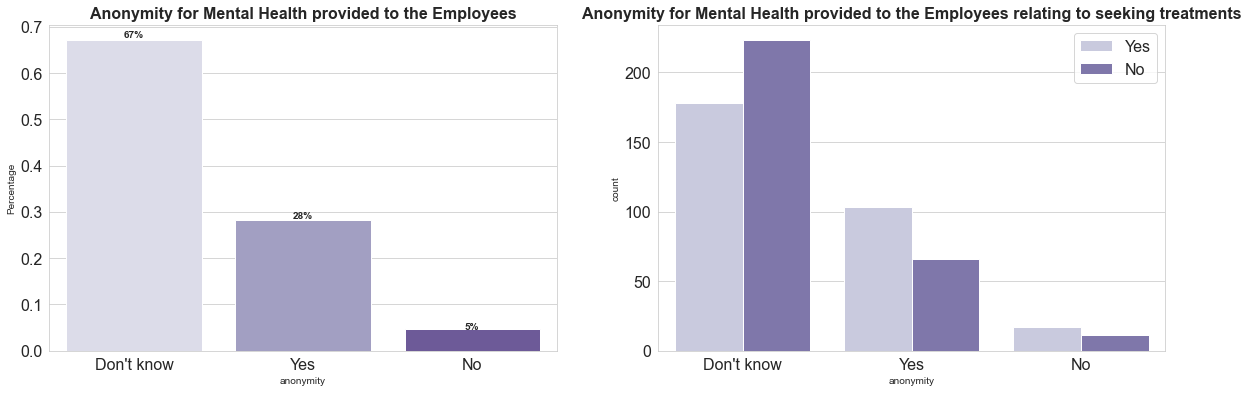

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
order = ["Don't know", "Yes", "No"]
sns.countplot(df['anonymity'], hue = df['treatment'], palette='Purples', order=order)
plt.title('Anonymity for Mental Health provided to the Employees relating to seeking treatments', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?"**

Around 67% of the people were not aware whether anonymity was provided to them and 28% said yes to the provision of anonymity by the company. We can see the positive sign which is more company have provide anomyity to their employee in taking about mentla helath problems. However, there are still a large precent of respondents do not know about provision of anonymity. Employee might hide mental health problem to their worker because of the social stigma attached to mental health. Therefore, they do not know whether the companies provide anonmity. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


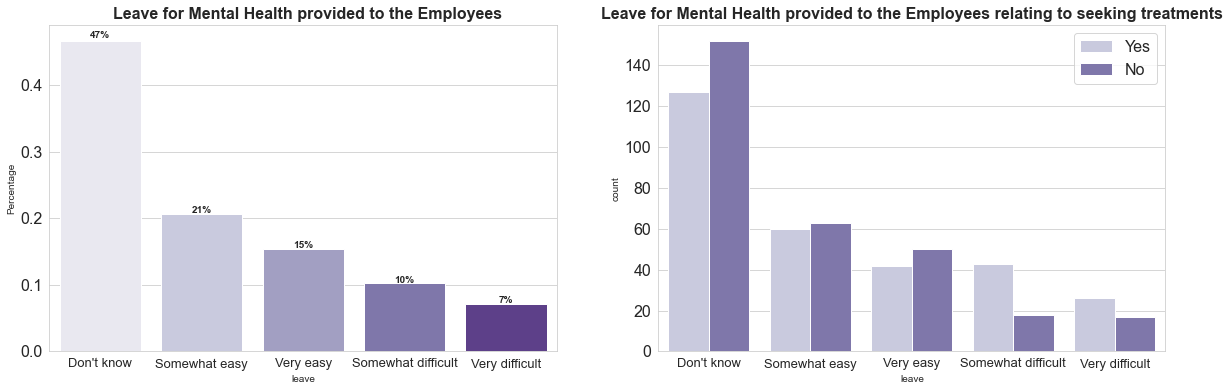

In [47]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
chart_order = ["Don't know", "Somewhat easy", "Very easy", "Somewhat difficult", "Very difficult"]
sns.countplot(df['leave'], hue = df['treatment'], palette='Purples', order=chart_order)
plt.title('Leave for Mental Health provided to the Employees relating to seeking treatments', fontsize=16, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"How easy is it for you to take medical leave for a mental health condition?"**

A large number of respondents (47%) do not know about it. This is understandable due to the fact the taking a break because of mental health is still a uncommon thing. 

For respondents who answer 'Somewhat difficult' or 'Very difficult', the majority of them have to seek treatments while for who answers 'Somewhat easy' or 'Very easy', the number of them seek treatment is fewer but the gap is not significant. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


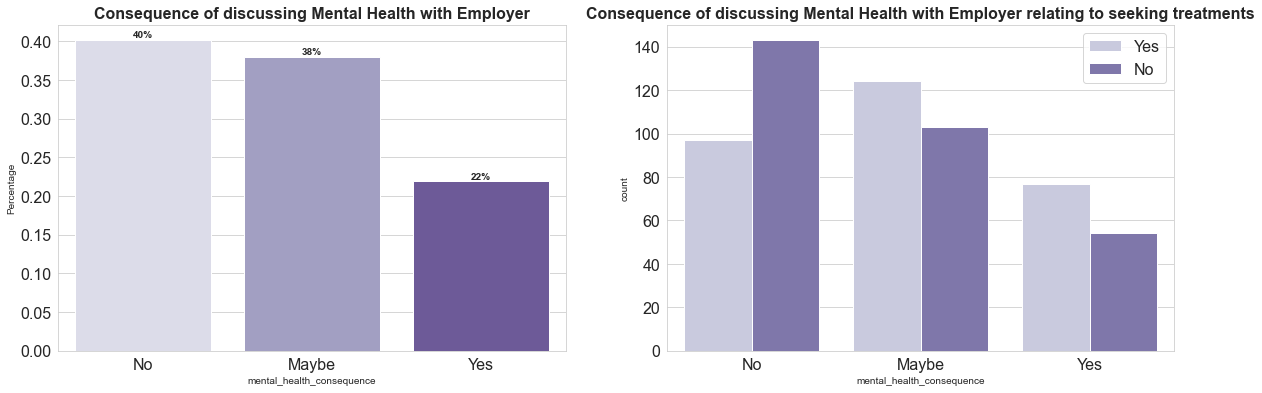

In [48]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_consequence'], hue = df['treatment'], palette='Purples')
plt.title('Consequence of discussing Mental Health with Employer relating to seeking treatments' , fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Do you think that discussing a mental health issue with your employer would have negative consequences?"**

Around same number of people (around 40% ) answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer and about 22% said Yes to it.

The respondents who answer 'No' having the least precentage of seeking treatment while in two other categories, the percentage is higher than 50%. It cound be concluded that discussing mental health with other can benefit their mental health overall. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


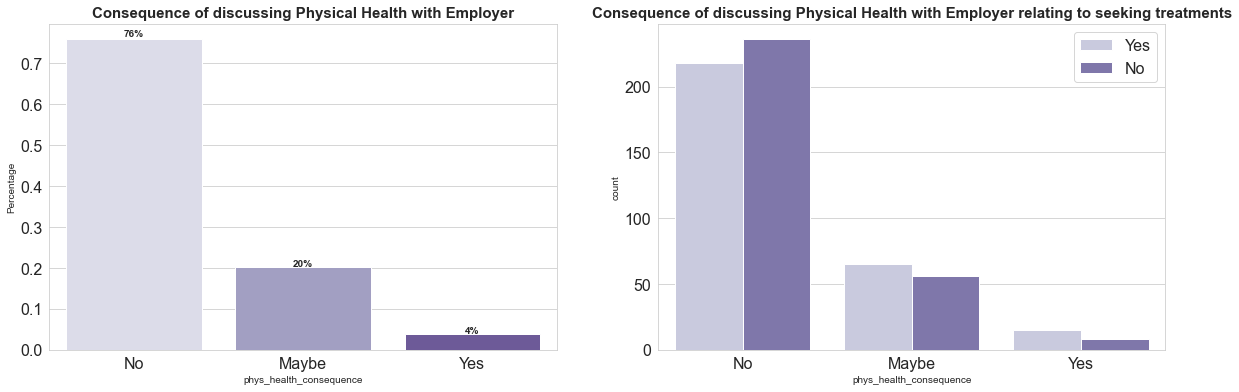

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=15, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
order1 = ["No", "Maybe", "Yes"]
sns.countplot(df['phys_health_consequence'], hue = df['treatment'], palette='Purples', order=order1)
plt.title('Consequence of discussing Physical Health with Employer relating to seeking treatments', fontsize=15, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Do you think that discussing a physical health issue with your employer would have negative consequences?"**

The key takeaway is that there are a major different when respondents discussing about mental health and physical health. 76% of respondents believe that dicussing physical health with their employer will not lead to any consequence and only 4% think it will. We can see that talking about mental health still a much harder than talking about physical health. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


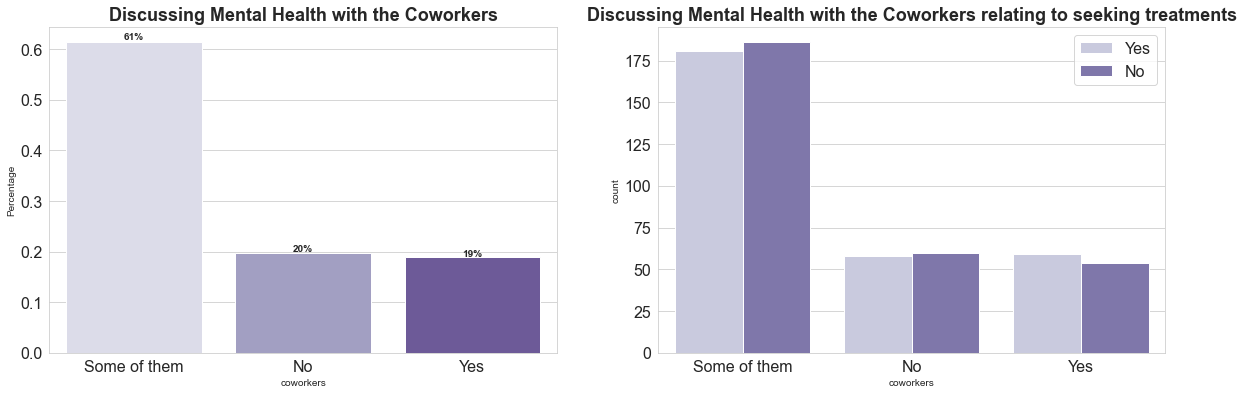

In [50]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['coworkers'], hue = df['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Coworkers relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Would you be willing to discuss a mental health issue with your coworkers?"**

Around 61% of respondents said that they are comfortable to discuss their mental health with some of their coworkder, may be they are their friends. And out of them, around 50% are seeking for treatments. 

Only 20% of respondents believe that dicussing mental health with cowoker are not suitable. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


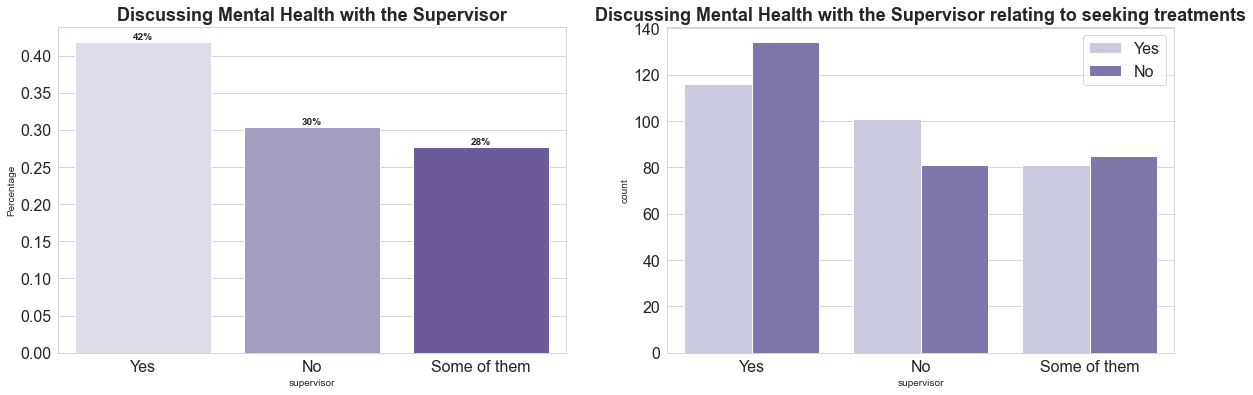

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'supervisor', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['supervisor'], hue = df['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Supervisor relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Would you be willing to discuss a mental health issue with your supervisor(s)?"**

Differ from the previous chart, around 40% of respondents willing to discuss mental health issue with their direct supervisor(s). This maybe because they want to explain about the performance. 

The percentage of respondents seeking treatment in all three category are similar to the previous chart. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


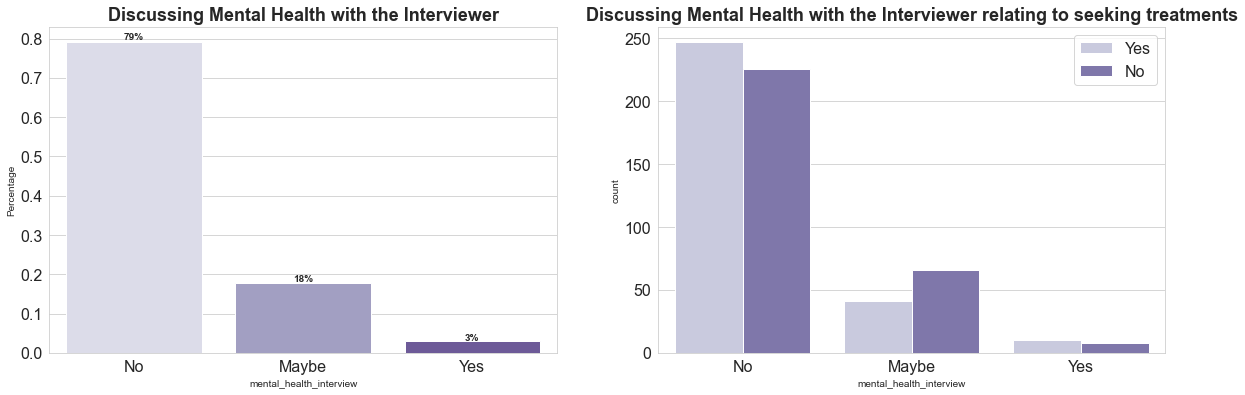

In [52]:

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
order2 = ["No", "Maybe", "Yes"]
sns.countplot(df['mental_health_interview'], hue = df['treatment'], palette='Purples', order=order2)
plt.title('Discussing Mental Health with the Interviewer relating to seeking treatments', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Do you think that discussing a mental health issue with your employer would have negative consequences?"**

Around 80% of respondents willing to discuss mental health with employer in the interview, which is a quite positive number. That indicates that there are a lot of people willing to discuss about mental health before they get into the job. 

While around 15% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


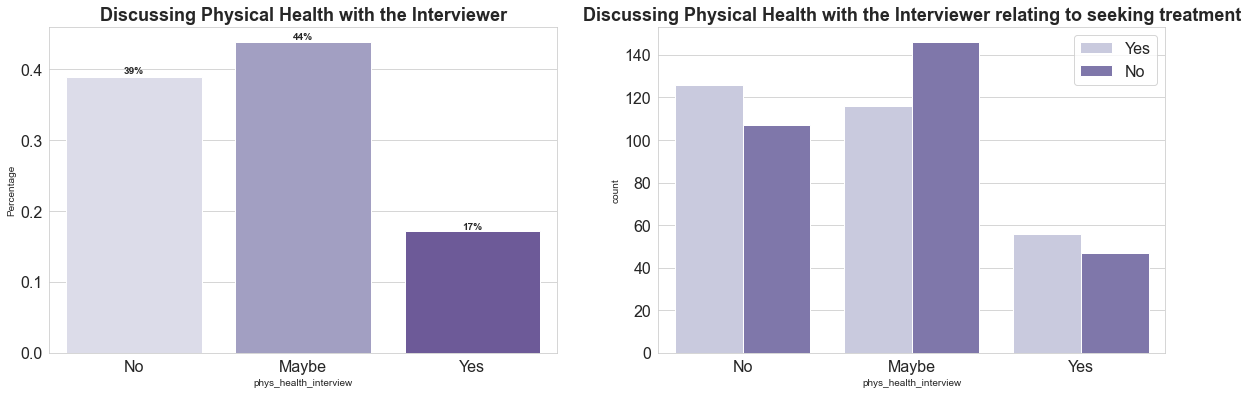

In [53]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
order3 = ["No", "Maybe", "Yes"]
eda_percentage = df['phys_health_interview'].value_counts(normalize = True).rename_axis('phys_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples', order=order3)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['phys_health_interview'], hue = df['treatment'], palette='Purples', order=order3)
plt.title('Discussing Physical Health with the Interviewer relating to seeking treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Would you bring up a physical health issue with a potential employer in an interview?"**

While a majority of the people are still confused about discussing their physical health condition with the future employer, however, close to 17% believe that there is no issue in discussing their physical health conditions. This is quite opposite to the previous chart that more people willing to discuss about their mental health than physical health with their potantial employer. 

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


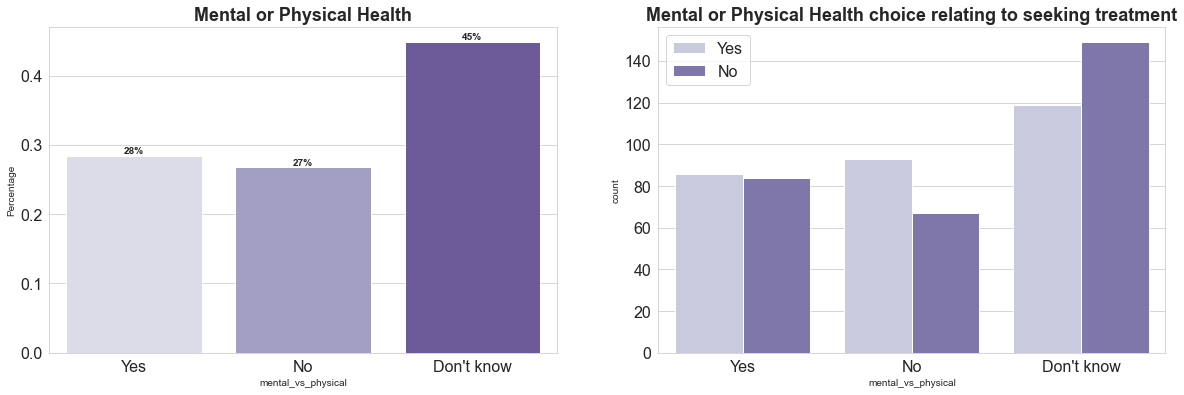

In [54]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
order4 = ["Yes", "No", "Don't know"]
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples', order=order4)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_vs_physical'], hue = df['treatment'], palette='Purples',order=order4)
plt.title('Mental or Physical Health choice relating to seeking treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Do you feel that your employer takes mental health as seriously as physical health?"**

While close to 50% people said that they didn't know, the number of people who answered Yes as well as No were completely equal and the majority of them are seeking treatments.

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


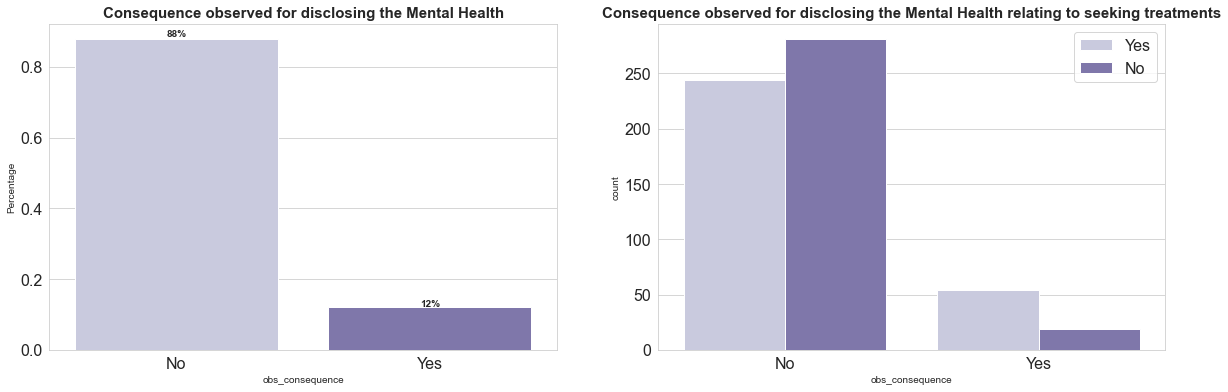

In [55]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')
plt.title('Consequence observed for disclosing the Mental Health', fontsize=15, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['obs_consequence'], hue = df['treatment'], palette='Purples')
plt.title('Consequence observed for disclosing the Mental Health relating to seeking treatments', fontsize=15, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the result of responds to question: **"Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?"**

Majority of respondent (88%) answer 'No' to this question. I believe this is not because mental health have to affect on their work but tech industry is an organised sector and having strict guidelines. Therefore, they do not be influenced heavily by their mental health problems. 